# CNN + M/L Classifier

# Feature Extract by CNN Model - vgg16

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# VGG16 모델 로드 및 FC 레이어 제거
base_model = VGG16(weights='imagenet', include_top=False)

# 특성 추출을 위한 새로운 모델 정의 (최종 레이어의 출력을 특성으로 사용)
model = Model(inputs=base_model.input, outputs=base_model.output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_features(img_path):
    # 이미지 로드 및 전처리
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # 특성 추출
    features = model.predict(x)
    return features

def process_and_save_features(data_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 데이터셋 종류별 폴더 순회 (train, test, val)
    for dataset_type in ['train', 'test', 'val']:
        dataset_path = os.path.join(data_dir, dataset_type)
        output_dataset_path = os.path.join(output_dir, dataset_type)

        if not os.path.exists(output_dataset_path):
            os.makedirs(output_dataset_path)

        # 질환 폴더 순회
        for classes_folder in os.listdir(dataset_path):
            classes_path = os.path.join(dataset_path, classes_folder)
            if os.path.isdir(classes_path):
                features_list = []
                image_files = [f for f in os.listdir(classes_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

                # 각 이미지 파일에 대해 특성 추출
                for img_file in image_files:
                    img_path = os.path.join(classes_path, img_file)
                    features = extract_features(img_path)
                    features_list.append(features)

                # 특성을 numpy 배열로 변환 및 저장
                features_array = np.vstack(features_list)
                output_file = os.path.join(output_dataset_path, f"{classes_folder}_features.npy")
                np.save(output_file, features_array)
                print(f"Features saved to {output_file}")

In [ ]:
# 데이터 디렉토리 경로와 출력 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/IITP_졸음운전/CNN/CNN_dataset'
output_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted'

# 특성 추출 및 저장 실행
process_and_save_features(data_dir, output_dir)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 92ms/step
Features saved to /content/drive/MyDrive/본프로젝트_천대원/졸음운전/XGBoost/Feature_Extracted/val/drowsy_features.npy
1/1 [==============================] - 0s 132ms/step
Features saved to /content/drive/MyDrive/본프로젝트_천대원/졸음운전/XGBoost/Feature_Extracted/val/normal_features.npy
1/1 [==============================] - 0s 112ms/step
Features saved to /content/drive/MyDrive/본프로젝트_천대원/졸음운전/XGBoost/Feature_Extracted/val/phone_features.npy
1/1 [==============================] - 0s 105ms/step
Features saved to /content/drive/MyDrive/본프로젝트_천대원/졸음운전/XGBoost/Feature_Extracted/val/search_features.npy


# Save Image Features to Npy File

In [ ]:
import numpy as np
import os

In [ ]:
# 공통 경로 변수
base_path = "/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/train/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
train_drowsy = np.load(base_path + "drowsy_features.npy")
train_normal = np.load(base_path + "normal_features.npy")
train_phone = np.load(base_path + "phone_features.npy")
train_search = np.load(base_path + "search_features.npy")

# 넘파이 배열을 하나로 합침
train_all_features = np.concatenate((train_drowsy,
                                     train_normal,
                                     train_phone,
                                     train_search), axis=0)

In [ ]:
# 공통 경로 변수
base_path = "/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/test/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
test_drowsy = np.load(base_path + "drowsy_features.npy")
test_normal = np.load(base_path + "normal_features.npy")
test_phone = np.load(base_path + "phone_features.npy")
test_search = np.load(base_path + "search_features.npy")

# 넘파이 배열을 하나로 합침
test_all_features = np.concatenate((test_drowsy,
                                     test_normal,
                                     test_phone,
                                     test_search), axis=0)

In [ ]:
# 공통 경로 변수
base_path = "/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/val/"

# 각 질병별로 추출한 특징을 담고 있는 여러 개의 넘파이 배열
val_drowsy = np.load(base_path + "drowsy_features.npy")
val_normal = np.load(base_path + "normal_features.npy")
val_phone = np.load(base_path + "phone_features.npy")
val_search = np.load(base_path + "search_features.npy")

# 넘파이 배열을 하나로 합침
val_all_features = np.concatenate((val_drowsy,
                                     val_normal,
                                     val_phone,
                                     val_search), axis=0)

In [ ]:
from google.colab import files

all_features = np.concatenate((train_all_features, test_all_features, val_all_features), axis=0)

np.save('all_features.npy', all_features)

# .npy 파일 다운로드
files.download('all_features.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Xgboost Classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive/IITP_졸음운전/XGBoost

/content/drive/MyDrive/IITP_졸음운전/XGBoost


In [ ]:
# !unzip -qq /content/drive/MyDrive/IITP_졸음운전/XGBoost/labels.zip

In [ ]:
import os
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 라벨 로드 함수
def load_labels(labels_dir):
    labels = []
    data_types = ['train', 'test', 'val']
    class_folders = ['drowsy', 'search', 'phone', 'normal']

    for data_type in data_types:
        for class_folder in class_folders:
            folder_path = os.path.join(labels_dir, data_type, class_folder)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            labels.append(class_value)

    return np.array(labels)

In [ ]:
# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/labels'

# 라벨 로드
labels = load_labels(labels_dir)

In [ ]:
# 이미지 특성 및 클래스값 로드
features = np.load('/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/all_features.npy')

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 현재 features의 모양 확인
print(features.shape)  # 출력 예: (n_samples, n_features)

(64000, 4, 4, 2048)


In [ ]:
# 만약 features가 3차원 이상이라면, 필요에 따라 재구성
# 예를 들어, (n_samples, height, width, channels) 형태인 경우:
# features를 (n_samples, height * width * channels) 형태로 변환
if len(features.shape) > 2:
    n_samples = features.shape[0]
    features = features.reshape(n_samples, -1)  # -1은 나머지 차원을 자동으로 결정하게 함

# 다시 모양을 확인
print(features.shape)  # 재구성 후 모양 확인

(64000, 32768)


In [ ]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

# 이제 XGBoost용 데이터 객체 생성 가능
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
print(len(np.unique(encoded_labels)))

4


In [ ]:
# XGBoost 모델 설정 (GPU 사용)
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(encoded_labels)),
    'eval_metric': 'mlogloss',
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42,
    'tree_method': 'gpu_hist',  # GPU 사용
    'predictor': 'gpu_predictor'  # GPU 예측
}

# 모델 학습
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:58:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:58:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 예측
y_pred = bst.predict(dtest)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:58:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Accuracy: 92.88%


In [ ]:
# 분류 보고서
target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      drowsy       0.92      0.87      0.89      3169
      search       0.88      0.93      0.90      3120
       phone       0.96      0.97      0.97      3255
      normal       0.96      0.94      0.95      3256

    accuracy                           0.93     12800
   macro avg       0.93      0.93      0.93     12800
weighted avg       0.93      0.93      0.93     12800



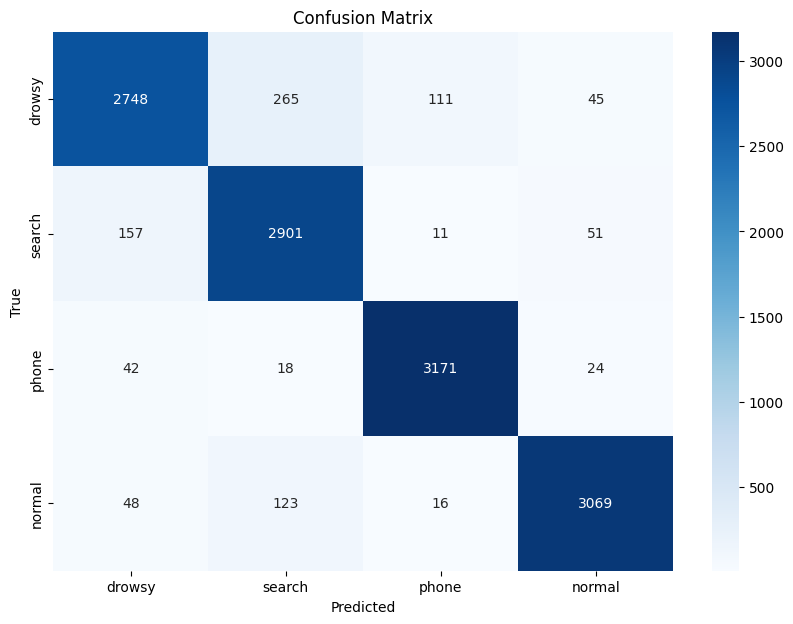

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Xgboost - GridSearchCV

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 정의
# param_grid = {
#     'max_depth': [3, 6],
#     'learning_rate': [0.01, 0.1],
#     'n_estimators': [100, 200],
#     'gamma': [0, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # XGBClassifier 객체 생성
# xgb_model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

# # GridSearchCV 객체 생성
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# # 학습
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [ ]:
# # 최적 하이퍼파라미터로 모델 재학습
# best_params = grid_search.best_params_
# best_model = XGBClassifier(**best_params, tree_method='gpu_hist', predictor='gpu_predictor')
# best_model.fit(X_train, y_train)

In [ ]:
# # 예측
# y_pred = best_model.predict(X_test)

# target_names = ['drowsy', 'search', 'phone', 'normal']
# print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# # 오차행렬 계산
# cm = confusion_matrix(y_test, y_pred)

# # 오차행렬 시각화
# plt.figure(figsize=(10, 7))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# Support Vector Machine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


학습 속도를 개선하기 위해 numpy 형식을 cupy형식으로 변환하여 진행

In [ ]:
# 필수 라이브러리 불러오기
import os
import numpy as np
import cupy as cp
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
def load_labels(labels_dir):
    labels = []
    data_types = ['train', 'test', 'val']
    class_folders = ['drowsy', 'search', 'phone', 'normal']

    for data_type in data_types:
        for class_folder in class_folders:
            folder_path = os.path.join(labels_dir, data_type, class_folder)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            labels.append(class_value)

    return cp.asarray(labels)

In [ ]:
# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/labels'

# 라벨 로드
labels = load_labels(labels_dir)

# 이미지 특성 및 클래스값 로드
features = np.load('/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/all_features.npy')

In [ ]:
# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(cp.asnumpy(labels))

In [ ]:
# 현재 features의 모양 확인 및 필요 시 재구성
print(features.shape)  # 출력 예: (n_samples, n_features)
print('-'*40)
if len(features.shape) > 2:
    n_samples = features.shape[0]
    features = features.reshape(n_samples, -1)  # -1은 나머지 차원을 자동으로 결정하게 함
print(features.shape)  # 재구성 후 모양 확인

(64000, 4, 4, 2048)
----------------------------------------
(64000, 32768)


In [ ]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

# 특성 스케일링 (SVM은 데이터 스케일에 민감하므로 스케일링이 필요합니다)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 데이터를 GPU로 이동
X_train = cp.asarray(X_train)
X_test = cp.asarray(X_test)
y_train = cp.asarray(y_train)
y_test = cp.asarray(y_test)

In [ ]:
# params = {
#     'C': 0.8,
#     'kernel': 'rbf',
#     'gamma': 'scale'
# }

# svm_model = SVC(C=params['C'],
#                 kernel=params['kernel'],
#                 gamma=params['gamma'])

# svm_model.fit(cp.asnumpy(X_train), cp.asnumpy(y_train))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

# LinearSVC 모델 정의
estimator = LinearSVC()

# BaggingClassifier 정의
n_estimators = 10
n_jobs = 1
model = BaggingClassifier(estimator=estimator,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs)

# 모델 학습
model.fit(cp.asnumpy(X_train), cp.asnumpy(y_train))

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(cp.asnumpy(X_test))

target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(cp.asnumpy(y_test), y_pred, target_names=target_names))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 오차행렬 계산
cm = confusion_matrix(cp.asnumpy(y_test), cp.asnumpy(y_pred))

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regressor

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_labels(labels_dir):
    labels = []
    data_types = ['train', 'test', 'val']
    class_folders = ['drowsy', 'search', 'phone', 'normal']

    for data_type in data_types:
        for class_folder in class_folders:
            folder_path = os.path.join(labels_dir, data_type, class_folder)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            labels.append(class_value)

    return np.array(labels)

In [ ]:
# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/labels'

# 라벨 로드
labels = load_labels(labels_dir)

# 이미지 특성 및 클래스값 로드
features = np.load('/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/all_features.npy')

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# 현재 features의 모양 확인 및 필요 시 재구성
print(features.shape)  # 출력 예: (n_samples, n_features)
if len(features.shape) > 2:
    n_samples = features.shape[0]
    features = features.reshape(n_samples, -1)  # -1은 나머지 차원을 자동으로 결정하게 함
print(features.shape)  # 재구성 후 모양 확인

In [ ]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 직접 설정한 하이퍼파라미터
params = {
    'C': 1.0,  # 정규화 강도
    'solver': 'lbfgs',  # 최적화 알고리즘
    'max_iter': 1000,  # 최대 반복 횟수
    'multi_class': 'multinomial'  # 다중 클래스 옵션
}

# Logistic Regression 모델 생성 및 학습
logreg_model = LogisticRegression(C=params['C'],
                                  solver=params['solver'],
                                  max_iter=params['max_iter'],
                                  multi_class=params['multi_class'])

logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# 예측
y_pred = logreg_model.predict(X_test)

# 분류 보고서
target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      drowsy       0.90      0.88      0.89      3169
      search       0.89      0.91      0.90      3120
       phone       0.98      0.98      0.98      3255
      normal       0.96      0.95      0.96      3256

    accuracy                           0.93     12800
   macro avg       0.93      0.93      0.93     12800
weighted avg       0.93      0.93      0.93     12800



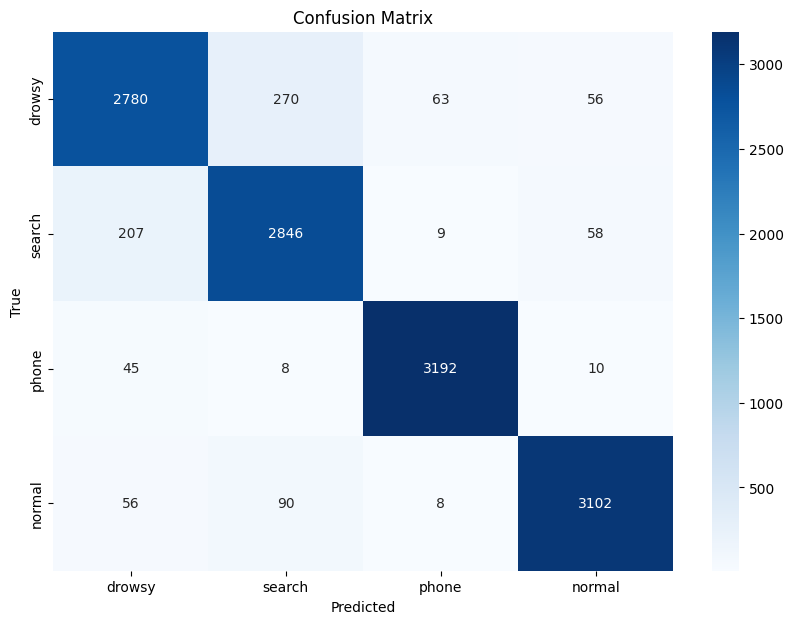

In [ ]:
# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_labels(labels_dir):
    labels = []
    data_types = ['train', 'test', 'val']
    class_folders = ['drowsy', 'search', 'phone', 'normal']

    for data_type in data_types:
        for class_folder in class_folders:
            folder_path = os.path.join(labels_dir, data_type, class_folder)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            labels.append(class_value)

    return np.array(labels)

In [ ]:
# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/labels'

# 라벨 로드
labels = load_labels(labels_dir)

# 이미지 특성 및 클래스값 로드
features = np.load('/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/all_features.npy')

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
# 현재 features의 모양 확인 및 필요 시 재구성
print(features.shape)  # 출력 예: (n_samples, n_features)
if len(features.shape) > 2:
    n_samples = features.shape[0]
    features = features.reshape(n_samples, -1)  # -1은 나머지 차원을 자동으로 결정하게 함
print(features.shape)  # 재구성 후 모양 확인

In [ ]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 직접 설정한 하이퍼파라미터
params = {
    'criterion': 'gini',  # 분할 품질 기준 ('gini' 또는 'entropy')
    'max_depth': None,  # 트리의 최대 깊이
    'min_samples_split': 2,  # 분할하기 위한 최소 샘플 수
    'min_samples_leaf': 1,  # 리프 노드의 최소 샘플 수
    'max_features': None  # 분할에 사용할 특성의 최대 수
}

# Decision Tree 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion=params['criterion'],
                                  max_depth=params['max_depth'],
                                  min_samples_split=params['min_samples_split'],
                                  min_samples_leaf=params['min_samples_leaf'],
                                  max_features=params['max_features'])
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 예측
y_pred = dt_model.predict(X_test)

# 분류 보고서
target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      drowsy       0.58      0.59      0.58      3169
      search       0.79      0.79      0.79      3120
       phone       0.75      0.74      0.75      3255
      normal       0.72      0.71      0.71      3256

    accuracy                           0.71     12800
   macro avg       0.71      0.71      0.71     12800
weighted avg       0.71      0.71      0.71     12800



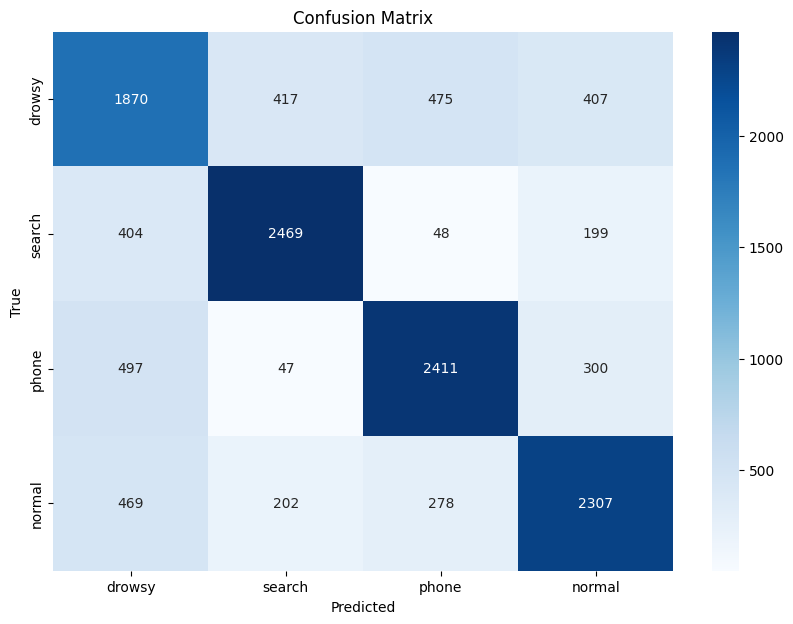

In [ ]:
# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def load_labels(labels_dir):
    labels = []
    data_types = ['train', 'test', 'val']
    class_folders = ['drowsy', 'search', 'phone', 'normal']

    for data_type in data_types:
        for class_folder in class_folders:
            folder_path = os.path.join(labels_dir, data_type, class_folder)
            for txt_file in sorted(os.listdir(folder_path)):
                if txt_file.endswith('.txt'):
                    with open(os.path.join(folder_path, txt_file), 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            parts = line.strip().split()
                            class_value = int(parts[0])  # class value
                            labels.append(class_value)

    return np.array(labels)

In [4]:
# 라벨 디렉토리 경로 설정
labels_dir = '/content/drive/MyDrive/IITP_졸음운전/XGBoost/labels'

# 라벨 로드
labels = load_labels(labels_dir)

# 이미지 특성 및 클래스값 로드
features = np.load('/content/drive/MyDrive/IITP_졸음운전/XGBoost/Feature_Extracted/all_features.npy')

# 레이블 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [5]:
# 현재 features의 모양 확인 및 필요 시 재구성
print(features.shape)  # 출력 예: (n_samples, n_features)
if len(features.shape) > 2:
    n_samples = features.shape[0]
    features = features.reshape(n_samples, -1)  # -1은 나머지 차원을 자동으로 결정하게 함
print(features.shape)  # 재구성 후 모양 확인

(64000, 4, 4, 2048)
(64000, 32768)


In [6]:
# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels,
                                                    test_size=0.2,
                                                    random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 랜덤포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# 예측
y_pred = rf_model.predict(X_test)

# 분류 보고서
target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      drowsy       0.91      0.65      0.76      3169
      search       0.84      0.94      0.89      3120
       phone       0.83      0.96      0.89      3255
      normal       0.91      0.92      0.91      3256

    accuracy                           0.87     12800
   macro avg       0.87      0.87      0.86     12800
weighted avg       0.87      0.87      0.86     12800



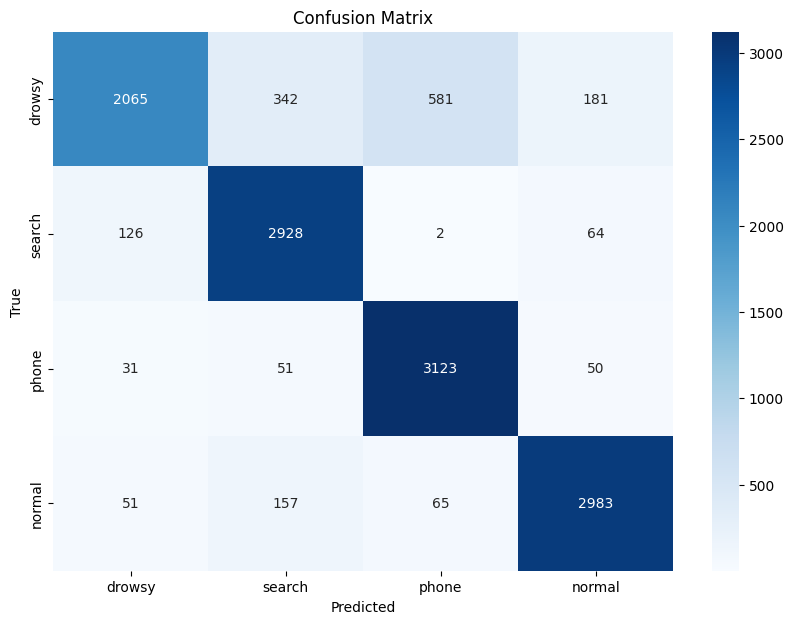

In [10]:
# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 랜덤 포레스트 하이퍼 파라미터 및 튜닝
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 모델 생성
rf_model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 설정 및 학습
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# 최적의 모델로 예측 수행
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# 분류 보고서
target_names = ['drowsy', 'search', 'phone', 'normal']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
# 오차행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 오차행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()